# Random Forest : company data

 
Problem Statement:
A cloth manufacturing company is interested to know about the segment or attributes causes high sale. 

Approach - A Random Forest can be built with target variable Sales 

(we will first convert it in categorical variable) & all other variable will be independent in the analysis.

In [2]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, classification_report
import matplotlib.pyplot as plt
from sklearn import tree
import seaborn as sns
import category_encoders as ce
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 1000
sns.set_theme(style='darkgrid', palette='rainbow')
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('Company_data.csv')
df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [5]:
df.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [6]:
df.duplicated().sum()

0

In [7]:
encoder=ce.OrdinalEncoder(cols=['ShelveLoc','Urban', 'US'])
sales1=encoder.fit_transform(df)
sales1

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,1,42,17,1,1
1,11.22,111,48,16,260,83,2,65,10,1,1
2,10.06,113,35,10,269,80,3,59,12,1,1
3,7.40,117,100,4,466,97,3,55,14,1,1
4,4.15,141,64,3,340,128,1,38,13,1,2
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,2,33,14,1,1
396,6.14,139,23,3,37,120,3,55,11,2,1
397,7.41,162,26,12,368,159,3,40,18,1,1
398,5.94,100,79,7,284,95,1,50,12,1,1


In [ ]:
#Approach 1
# now converting sales data into categorical column,considering sales cutoff at 7.49 to conver sales data into high and low
#approach 2
#we can also use binning concept

#we are using approach 1

In [9]:
sales_val = []
for value in df["Sales"]:
    if value<=7.49:
        sales_val.append("low")
    else:
        sales_val.append("high")
        
sales1["sales_val"]= sales_val

In [11]:
sales_val

['high',
 'high',
 'high',
 'low',
 'low',
 'high',
 'low',
 'high',
 'low',
 'low',
 'high',
 'high',
 'low',
 'high',
 'high',
 'high',
 'high',
 'high',
 'high',
 'high',
 'low',
 'high',
 'low',
 'low',
 'high',
 'high',
 'high',
 'low',
 'low',
 'high',
 'high',
 'high',
 'low',
 'high',
 'low',
 'high',
 'high',
 'low',
 'low',
 'low',
 'low',
 'high',
 'high',
 'low',
 'low',
 'low',
 'high',
 'low',
 'low',
 'high',
 'low',
 'low',
 'high',
 'low',
 'low',
 'low',
 'high',
 'low',
 'low',
 'low',
 'high',
 'low',
 'low',
 'high',
 'high',
 'low',
 'high',
 'high',
 'high',
 'high',
 'high',
 'low',
 'low',
 'high',
 'low',
 'high',
 'high',
 'high',
 'low',
 'high',
 'high',
 'high',
 'high',
 'low',
 'low',
 'high',
 'high',
 'high',
 'low',
 'high',
 'low',
 'low',
 'low',
 'high',
 'high',
 'low',
 'high',
 'low',
 'high',
 'low',
 'low',
 'low',
 'low',
 'low',
 'low',
 'low',
 'low',
 'high',
 'low',
 'high',
 'high',
 'low',
 'low',
 'low',
 'high',
 'high',
 'low',
 'hig

In [16]:
#splitting the data
x=sales1.drop(['sales_val','Sales'],axis=1)
y=sales1['sales_val']

In [18]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=40)

# Random forest using classification Model

In [19]:
rfc = RandomForestClassifier()
rfc.fit(xtrain,ytrain)
yp = rfc.predict(xtest)


In [20]:
yp

array(['low', 'high', 'low', 'high', 'low', 'low', 'high', 'high', 'low',
       'high', 'low', 'low', 'high', 'high', 'high', 'low', 'high', 'low',
       'low', 'low', 'high', 'high', 'high', 'high', 'low', 'low', 'high',
       'low', 'high', 'high', 'high', 'low', 'high', 'high', 'low',
       'high', 'low', 'low', 'high', 'high', 'low', 'low', 'low', 'high',
       'low', 'high', 'low', 'low', 'low', 'low', 'low', 'low', 'high',
       'high', 'low', 'high', 'high', 'high', 'high', 'low', 'low', 'low',
       'high', 'high', 'low', 'high', 'high', 'low', 'high', 'high',
       'high', 'high', 'high', 'low', 'low', 'high', 'low', 'low', 'low',
       'high', 'low', 'low', 'low', 'low', 'low', 'high', 'high', 'low',
       'low', 'high', 'low', 'low', 'high', 'low', 'low', 'low', 'low',
       'high', 'low', 'low', 'high', 'high', 'high', 'high', 'low', 'low',
       'low', 'high', 'high', 'low', 'low', 'low', 'high', 'low', 'low',
       'low', 'high', 'high', 'high', 'low'], dtype

In [21]:
print(classification_report(ytest,yp))

              precision    recall  f1-score   support

        high       0.66      0.71      0.69        52
         low       0.77      0.72      0.74        68

    accuracy                           0.72       120
   macro avg       0.71      0.72      0.71       120
weighted avg       0.72      0.72      0.72       120



In [ ]:
rfc.estimators_

In [23]:
len(rfc.estimators_)

100

In [24]:
df.columns

Index(['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US'],
      dtype='object')

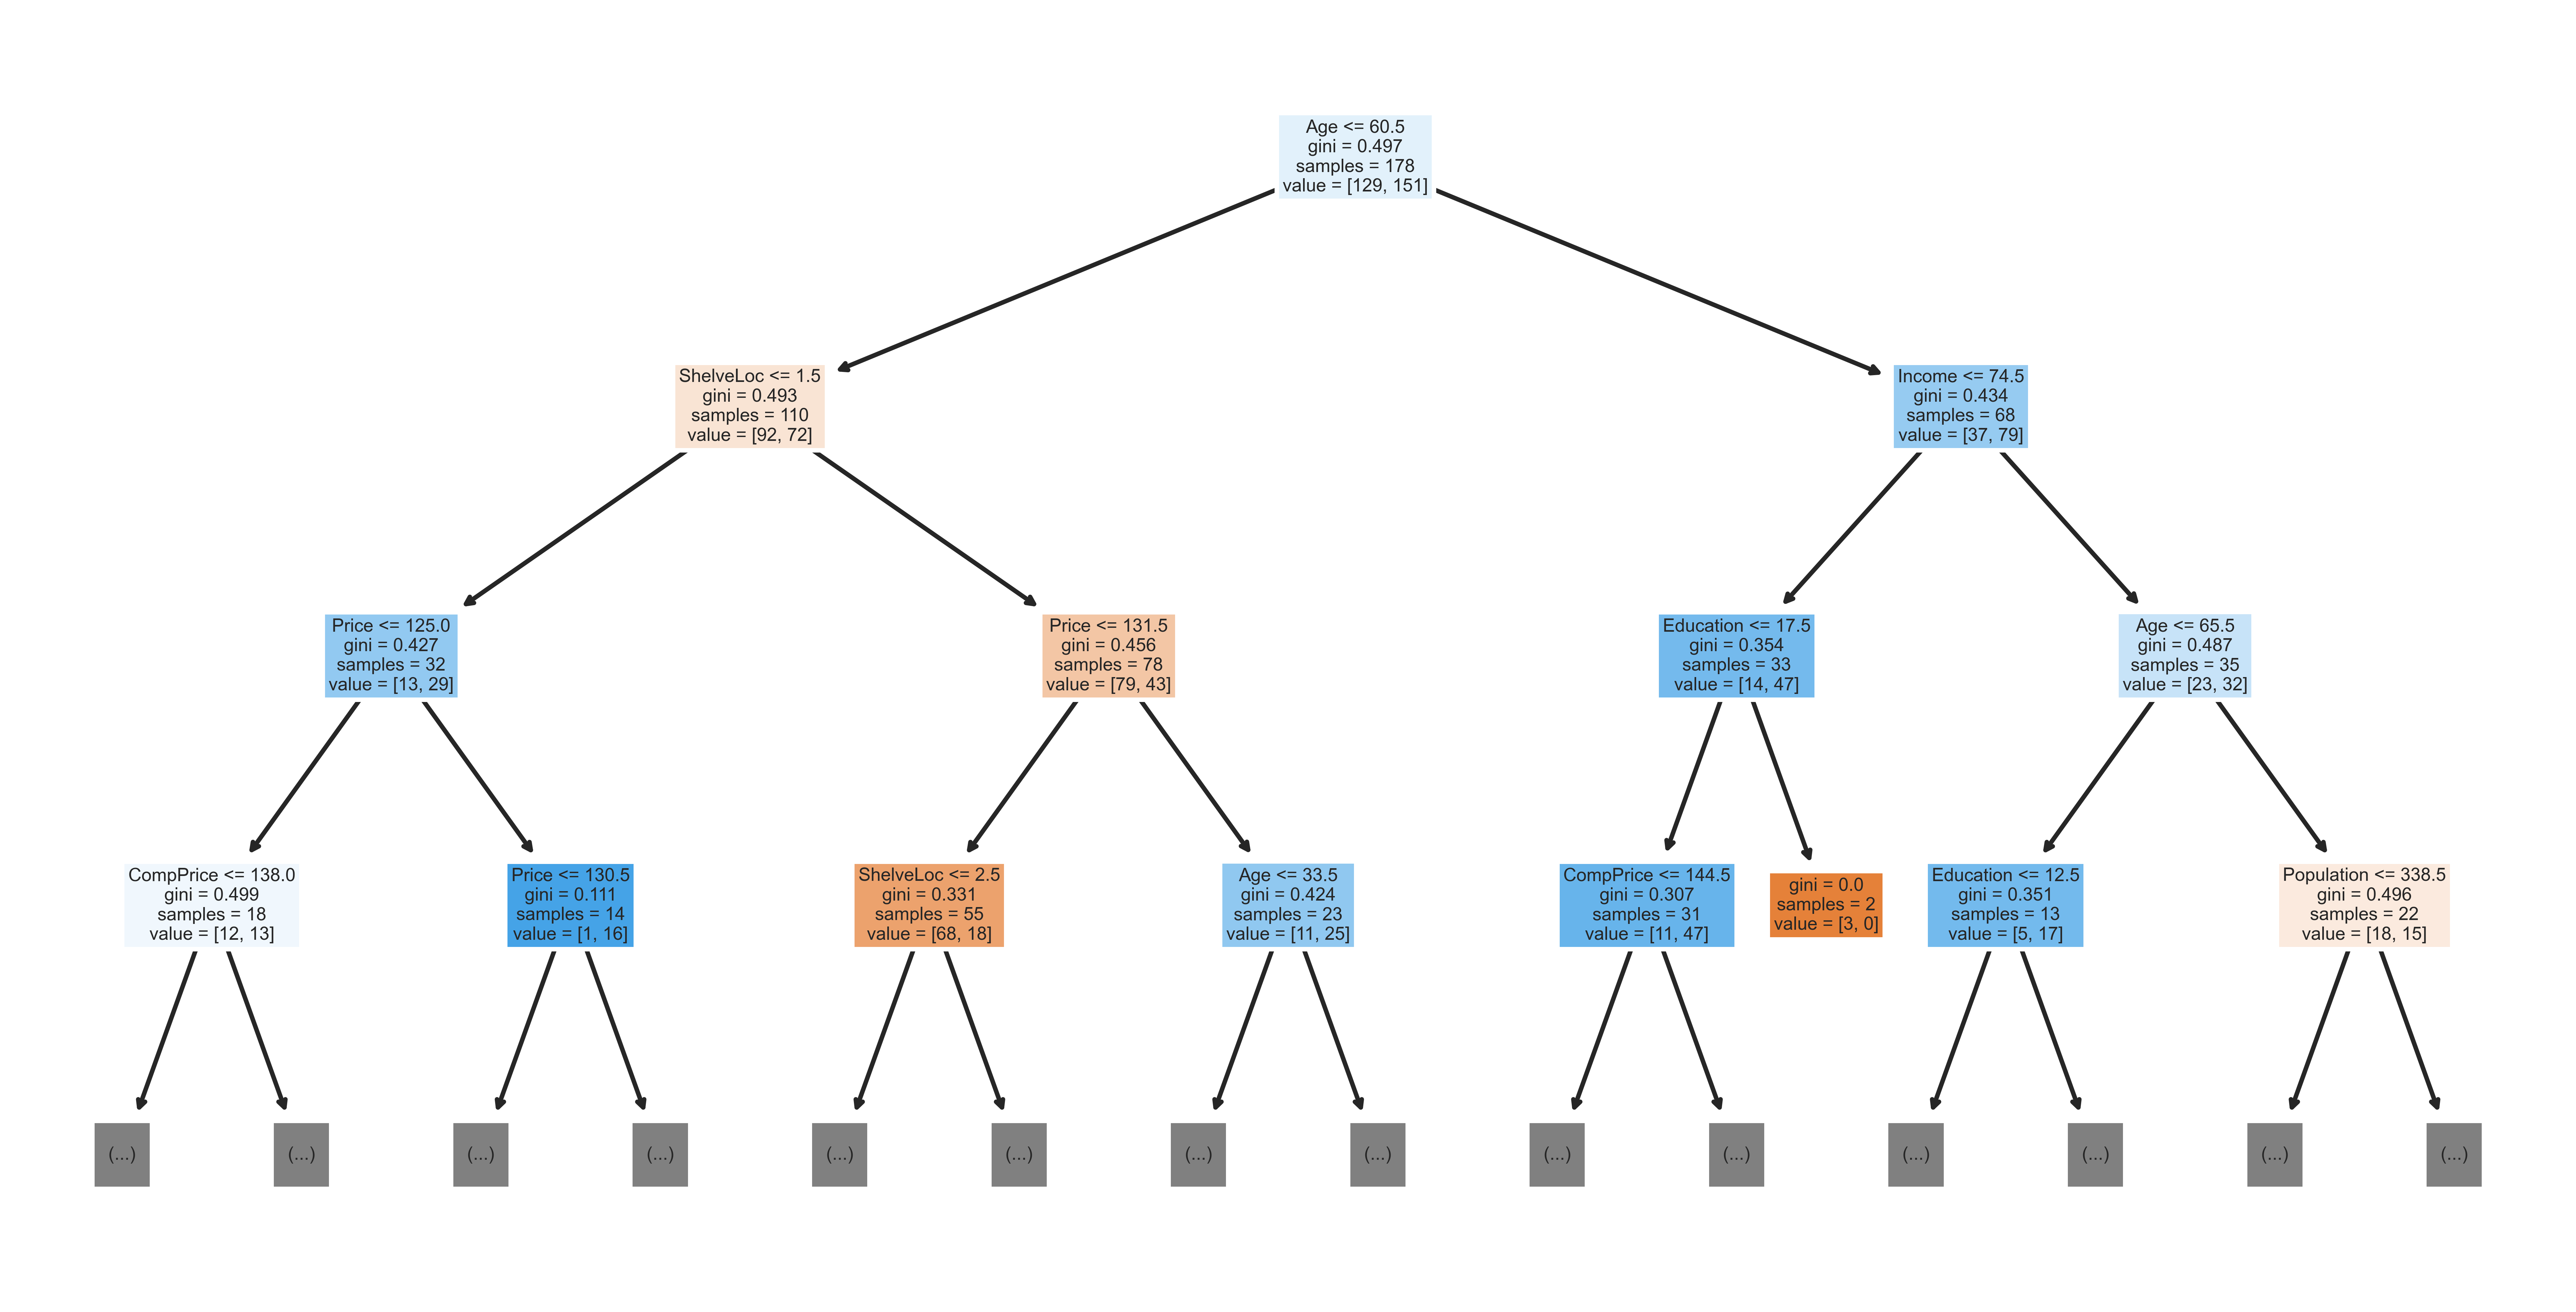

In [25]:
tree.plot_tree(rfc.estimators_[0], feature_names=['CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US'],
              filled=True, max_depth=3)
plt.show()